# Bonus


## Import Dependencies

In [19]:
import os
import psycopg2
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm 
import numpy as np

sql_pwd = os.environ.get('PostgreSQL_Key')

sql_pwd

## SQL Connection Stuff

In [8]:
# setup connection
from sqlalchemy import create_engine

# engine = create_engine('postgresql://localhost:5432/ph_employee_db')

hostname = 'localhost'
username = 'postgres'
password = 'postgres'
database = 'ph_employee_db'

connection = psycopg2.connect(host=hostname, user=username, password=password, dbname=database )


## Running first query

In [15]:
cur = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
try:
    cur.execute("""SELECT * from department""")
except:
    print ("I can't SELECT from department")
    
rows = cur.fetchall()
for row in rows:
    print("   ", row['dept_name'])   

    Marketing
    Finance
    Human Resources
    Production
    Development
    Quality Management
    Sales
    Research
    Customer Service


## Make a dataframe of salary table

In [18]:
salary_df = pd.read_sql_query('select * from "salary"',con=connection)

salary_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


## Distribution of Employee Salaries

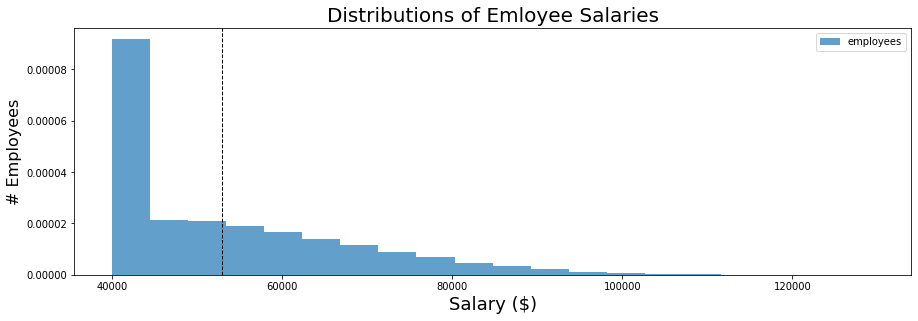

In [20]:

plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Emloyee Salaries', fontsize=20)
plt.xlabel('Salary ($)', fontsize=18)
plt.ylabel('# Employees', fontsize=16)
plt.hist(salary_df['salary'], 20, density=True, alpha=0.7, label="employees")
plt.axvline(salary_df['salary'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.savefig('images\dist_salary.png')



## df Avg Salary per Title

In [22]:
avg_title_salary_df = pd.read_sql_query('SELECT t.title, ROUND(AVG(s.salary),0) AS Avg_Salary FROM "title" t INNER JOIN "employee" e ON t.emp_no = e.emp_no INNER JOIN "salary" s ON e.emp_no = s.emp_no GROUP BY t.title; ',con=connection)

avg_title_salary_df.head()

,title,avg_salary
0,Assistant Engineer,48493.0
1,Engineer,48540.0
2,Manager,51531.0
3,Senior Engineer,48507.0
4,Senior Staff,58503.0


## Bar chart for avg Salary by Title

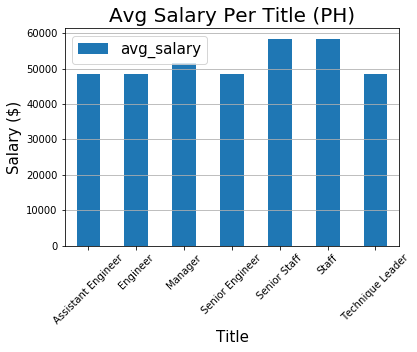

In [37]:
avg_chart = avg_title_salary_df.plot.bar(x='title', y='avg_salary', rot=45)

avg_chart.set_xlabel("Title", fontsize=15)
avg_chart.set_ylabel('Salary ($)', fontsize=15)
avg_chart.yaxis.grid(True)
avg_chart.legend(loc='best',fontsize=15) 
avg_chart.set_title('Avg Salary Per Title (PH)', fontdict={'fontsize': 20, 'fontweight': 'medium'})

avg_chart.get_figure().savefig('images/avg_salary_by_title.png')

# fig.savefig("images\avg_salary_by_title.png")

# ax.savefig('')